# 7.1 언어 모델을 사용한 문장 생성

기계번역, 음성 인식, 문장 생성

## 7.1.1 RNN을 사용한 문장 생성의 순서

<img src="../../../data/deep_learning_2_images/fig 7-1.png" height="300"> 
<img src="../../../data/deep_learning_2_images/fig 7-2.png" height="300">

- 결정적인 방법, 확률이 가장 높은 단어를 선택하는 방법
- 확률적인 방법, 확률에 맞게 선택. 매번 다른 문장이 생성됨

<img src="../../../data/deep_learning_2_images/fig 7-3.png" height="500">
<img src="../../../data/deep_learning_2_images/fig 7-4.png" height="500">

- 위와 같이 샘플링을 반복하면 문장을 만들 수 있음
- 학습한 패턴을 결과로 확률분포 생성. 그 전에 없던 문장을 만들 수 있음

## 7.1.2 문장 생성 구현

In [1]:
import sys
sys.path.append('../../modules/Part2/')
import numpy as np
from common.functions import softmax
from rnnlm import Rnnlm
from better_rnnlm import BetterRnnlm

In [5]:
class RnnlmGen(Rnnlm):
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]
    
    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1, 1)
      score = self.predict(x)
      
      p = softmax(score.flatten())
      
      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
        
    return word_ids

In [6]:
from dataset import ptb

In [18]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
# model.load_params('../../../data/pickles/Rnnlm.pkl')

start_word='you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you safety optimistic accepting need companies rewards commerce martin defenders santa calculated financially independence indicated hugo punitive kids bruce characteristic gitano main salvador compare pipe authorities abolished tracks worrisome baby tons goals patel odds architecture researcher linda shortage whole remark seabrook accessories faith resign gross contractor function succeed exception bag quayle generale influenced lawn subsidizing intriguing counsel page plagued recapitalization catalyst considerations buyers fever conducting ernst elected advantages ethics standardized volumes allowance murray regions raised extra song no. image bother mistake battle replies performance bargains buffett bankers ind. mission nsc bias mexican development underscored jr clobbered overtime marks front wearing


In [16]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../../../data/pickles/Rnnlm.pkl')

start_word='you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you told good news or may become economic problems.
 although results like the nose boosted by additional rises and beef at a compromise time funds may n't match the significance of making key attitude there.
 mr. jones is a precise a chapter years some underwear while both are of several young young chile way.
 he has issued a maximum of the nation 's founder maidenform 's hollywood pledged.
 this would be brought at about albert nato noriega insurance junk on at least when the key accessible and common was the appropriations program.
 a fear of


## 7.1.3 더 좋은 문장으로

In [20]:
class RnnlmGen(BetterRnnlm):
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]
    
    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1, 1)
      score = self.predict(x)
      
      p = softmax(score.flatten())
      
      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
        
    return word_ids

In [22]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../../../data/pickles/BetterRnnlm.pkl')

start_word='you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you consider a matter to make wrong n.j both becoming out of shifting the child-care take to achieve.
 blockbuster corp. has a massive dun airlines with close copyright scheduled to make march the systems.
 soaring from all it announced completely portions of more vested a operator and with a horse action and the treasury in may which would ever be eligible premium.
 officials recorders is spent a road.
 it expects out personal constituents a family to change choices in a single salary.
 surely a ford veteran itself will do long lend our departure.
 but


In [25]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../../../data/pickles/BetterRnnlm.pkl')

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids, sample_size=10)
word_ids = start_ids[:-1] + word_ids

txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)


--------------------------------------------------
the meaning of life is junk-holders a bigger time from true somewhere in that


# 7.2 seq2seq

- 세상에는 시계열 데이터가 넘쳐난다.
- 언어 데이터, 음성 데이터, 동영상 데이터는 모두 시계열 데이터
- 시계열 데이터 -> 시계열 데이터 / 기계번역, 음성 인식, 챗봇, 컴파일러
- 입력과 출력이 모두 시계열 데이터인 문제는 아주 많다.
- 2개의 RNN을 이용

## 7.2.1 seq2seq의 원리

- Encoder-Decoder 모델
  - Encoder , 입력 데이터를 인코딩 (부호화)
  - Decoder , 인코딩된 데이터를 디코딩(복호화)

<img src="../../../data/deep_learning_2_images/fig 7-5.png" height="200">

- Encoder가 인코딩한 정보에는 번역에 필요한 정보가 조밀하게 응집되어 있다.
- Decoder는 조밀하게 응축된 이 정보를 바탕으로 도착어 문장을 생성

<img src="../../../data/deep_learning_2_images/fig 7-6.png" height="200">

- h는 고정 길이 멕터

<img src="../../../data/deep_learning_2_images/fig 7-7.png" height="200">

- 이렇게 생성한 은닉 상태 벡터를 decoder의 input으로 사용할 수 있음


<img src="../../../data/deep_learning_2_images/fig 7-8.png" height="200">

<img src="../../../data/deep_learning_2_images/fig 7-9.png" height="200">

- LSTM 계층의 은닉 상태가 Encoder와 Decoder를 이어주는 '가교'가 된다.
- 역전파 때는 이 '가교'를 통해 기울기가 Decoder로부터 Encoder로 전해짐

## 7.2.2 시계열 데이터 변환용 장난감 문제 
- toy problem : 머신러닝을 평가하고자 만든 간단한 문제

<img src="../../../data/deep_learning_2_images/fig 7-10.png" height="200">

- seq2seq는 덧셈 규칙에 대해서 무지함. 문자의 패턴을 통해 이를 학습할 수 있을까?

- 단어 단위가 아닌 문자 단위로 분할

## 7.2.3 가변 길이 시계열 데이터

- 덧셈 문제에서는 샘플마다 데이터의 시간 방향 크기가 다르다.
- 가변 길이 시계열 데이터를 미니배치로 학습하기 위한 가장 단순한 방법은 "패딩"을 사용하는 것

<img src="../../../data/deep_learning_2_images/fig 7-11.png" height="200">

- 최대 길이로 통일
- 구분자 (_) -> Decoder에게 문자열을 생성하라고 알리는 신호로 사용됨

- 패딩 전용 처리를 추가해야 함
- Decoder에 입력된 데이터가 패딩이라면 손실의 결과에 반영 x
- Encoder에 입력된 데이터가 패딩이라면 LSTM 계층이 이전 시각의 입력을 그대로 출력하게 함

## 7.2.4 덧셈 데이터셋

In [26]:
import sys
sys.path.append('../../modules/Part2/')
from dataset import sequence

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()


print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)


In [28]:
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


# 7.3 seq2seq 구현

- 2개의 RNN을 연결한 신경망

## 7.3.1 Encoder 클래스

<img src="../../../data/deep_learning_2_images/fig 7-13.png" height="100">
<img src="../../../data/deep_learning_2_images/fig 7-14.png" height="200">
<img src="../../../data/deep_learning_2_images/fig 7-15.png" height="200">

In [29]:
class Encoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    
    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
    
    self.params = self.embed.params + self.lstm.params
    self.grads = self.embed.grads + self.lstm.grads
    self.hs = None
    
  def forward(self, xs):
    xs = self.embed.forward(xs)
    hs = self.lstm.forward(xs)
    self.hs = hs
    return hs[:, -1, :]
  
  def backward(self, dh):
    dhs = np.zeros_like(self.hs)
    dhs[:, -1, :] = dh
    
    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout)
    
    return dout

## 7.3.2 Decoder 클래스

<img src="../../../data/deep_learning_2_images/fig 7-16.png" height="200"> </br>
<img src="../../../data/deep_learning_2_images/fig 7-17.png" height="200">

- 학습 시와 생성 시의 데이터 부여 방법이 다름
  - 학습 시는 정답을 알고 있기 때문에 시계열 방향의 데이터를 한번에 줄 수 있다.
  - 반면, 추론시는 최초 시작을 알리는 문자를 주고 샘플링 후 이를 입력데이터로 입력하는 과정을 반복


<img src="../../../data/deep_learning_2_images/fig 7-18.png" height="300">

- 학습시에는 SoftMax with Loss 계층이 필요함. 추론시에는 필요없음

<img src="../../../data/deep_learning_2_images/fig 7-19.png" height="300">


In [31]:
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astpye('f')
    
    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
    self.affine = TimeAffine(affine_W, affine_b)
    
    self.params, self.grads = [], []
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads
    
  def forward(self, xs, h):
    self.lstm.set_state(h)
    
    out = self.embed.forward(xs)
    out = self.lstm.forward(xs)
    score = score.affine.forward(out)
    
    return score
  
  def backward(self, dscore):
    dout = self.affine.backward(dscore)
    dout = self.lstm.backward(dout)
    dout = self.embed.backward(dout)
    dh = self.lstm.dh
    
    return dh
  
  def generate(self, h, start_id, sample_size):
    sampled = []
    sample_id = start_id
    self.lstm.set_state(h)
    
    for _ in range(sample_size):
      x = np.array(sample_id).reshape((1, 1))
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)
      
      sample_id = np.argmax(score.flatten())
      sampled.append(sample_id)
      
    return sampled

## 7.3.3 Seq2seq 클래스

- Encoder와 Decoder를 연결.
- Time Softmax with Loss 계층을 이용해 손실을 계산

In [33]:
import sys
sys.path.append('../../modules/Part2/')
from common.base_model import BaseModel

class Seq2seq(BaseModel):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    
    self.encoder = Encoder(V, D, H)
    self.decoder = Decoder(V, D, H)
    self.softmax = TimeSoftmaxWithLoss()
    
    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.params + self.decoder.params
    
  def forward(self, xs, ts):
    decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
    h = self.encoder.forward(xs)
    score = self.decoder.forward(decoder_xs, h)
    loss = self.softmax.forward(score, decoder_ts)
    return loss
  
  def backward(self, dout=1):
    dout = self.softmax.backward(dout)
    dh = self.decoder.backward(dout)
    dout = self.encoder.backward(dh)
    return dout
  
  def generate(self, xs, start_id, sample_size):
    h = self.encoder.forward(xs)
    sampled = self.decoder.generate(h, start_id, sample_size)
    return sampled

## 7.3.4 seq2seq 평가

1. 학습 데이터에서 미니배치를 선택하고
2. 미니배치로부터 기울기를 계산하고
3. 기울기를 사용하여 매개변수를 갱신한다.

In [35]:
import sys
sys.path.append('../../modules/Part2/')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

In [36]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

In [37]:
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [38]:
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [39]:
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num / len(x_test))
  acc_list.append(acc)
  
  print(f"검증 정확도 : {acc * 100 :.3f}")

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 2[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 2[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 3[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 4[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 5[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 5[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 5[s] | 손실 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838

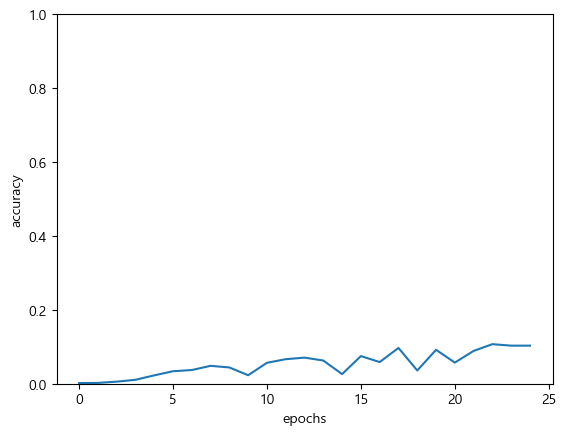

In [46]:
plt.ylim(0.0, 1.0)
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.show()

# 7.4 seq2seq 개선

## 7.4.1 입력 데이터 반전(Reverse)

<img src="../../../data/deep_learning_2_images/fig 7-23.png" height="200">

- 학습 진행이 빨라져서 결과적으로 최종정확도도 좋아진다.

In [47]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1] # 입력을 반전시킴

char_to_id, id_to_char = sequence.get_vocab()

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_reverse = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num / len(x_test))
  acc_list_reverse.append(acc)
  
  print(f"검증 정확도 : {acc * 100 :.3f}")

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 0[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 1[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 2[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 2[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 2[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 2[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 3[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 3[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 3[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 4[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 4[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 4[s] | 손실 1.73
Q   58+77
T 162 
X 100 
---
Q 461+579
T 1139
X 1000
---
Q  48+285
T 666 
X 1001
---
Q   551+8
T 163 
X 100 
---
Q  55+763
T 422 
X 1001
---
Q 752+006
T 857 
X 1000
---
Q 292+167
T 1053
X 1000
---
Q 795+038
T 1427
X 1000
---
Q  838+6

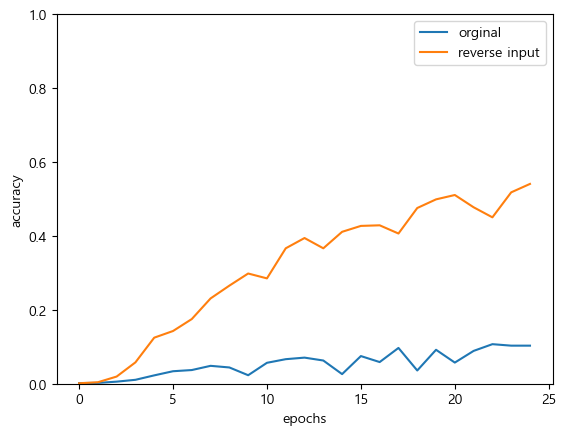

In [50]:
plt.ylim(0.0, 1.0)
plt.plot(acc_list, label='orginal')
plt.plot(acc_list_reverse, label='reverse input')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend()
plt.show()

## 7.4.2 엿보기 (Peeky)

<img src="../../../data/deep_learning_2_images/fig 7-25.png" height="300">

- h에는 decoder에 필요한 정보가 모두 담겨있다.
- 하지만 최초 시각의 LSTM 계층만이 벡터 h을 이용하고 있다.

<img src="../../../data/deep_learning_2_images/fig 7-26.png" height="300">

- 중요한 정보를 한 사람이 독점하는게 아니라 많은 사람과 공유한다면 더 올바른 결정을 내릴 가능성이 커진다.
- Peeky seq2seq

<img src="../../../data/deep_learning_2_images/fig 7-27.png" height="200">



In [51]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1] # 입력을 반전시킴

char_to_id, id_to_char = sequence.get_vocab()

model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_reverse_peeky = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num / len(x_test))
  acc_list_reverse_peeky.append(acc)
  
  print(f"검증 정확도 : {acc * 100 :.3f}")

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 1[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 2[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 2[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 2[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 3[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 3[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 4[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 4[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 4[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 5[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 5[s] | 손실 1.73
Q   58+77
T 162 
X 100 
---
Q 461+579
T 1139
X 1013
---
Q  48+285
T 666 
X 102 
---
Q   551+8
T 163 
X 100 
---
Q  55+763
T 422 
X 1023
---
Q 752+006
T 857 
X 1023
---
Q 292+167
T 1053
X 1023
---
Q 795+038
T 1427
X 1111
---
Q  838+6

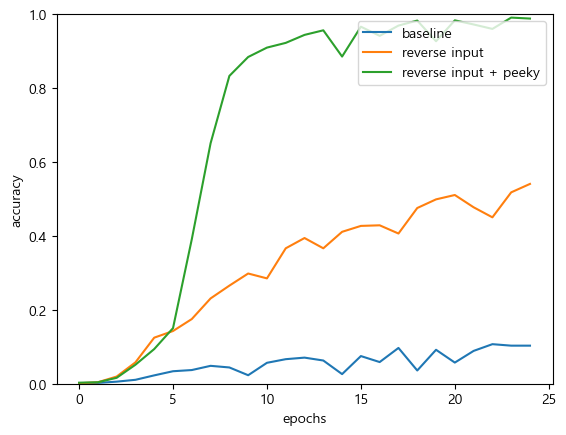

In [55]:
plt.ylim(0.0, 1.0)
plt.plot(acc_list, label='baseline')
plt.plot(acc_list_reverse, label='reverse input')
plt.plot(acc_list_reverse_peeky, label='reverse input + peeky')

plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(loc='upper right')
plt.show()

결과 정리
- 입력 문장을 반전 시키는 reverse + Encoder의 정보를 널리퍼지는 Peeky -> 결과 대폭 향상
- 핸디캡, 파라미터의 수 증가. 계산량 증가.
- 하이퍼파라미터에 영향을 크게 받음. 실제 문제에서 결과 보장 x.

# 7.5 seq2seq를 이용하는 애플리케이션

- 한 시계열 데이터 -> 다른 시계열 데이터 , 변환
- 기계 번역 : '한 언어의 문장'을 '다른 언어의 문장'으로 변환
- 자동 요약 : '긴 문장'을 '짧게 요약된 문장'으로 변환
- 질의응답 : '질문'을 '응답'으로 변환
- 메일 자동 응답 : '받은 메일의 문장'을 '답글'로 변환

- 2개가 짝을 이루는 시계열 데이터를 다루는 문제에 이용 가능
- 음성, 영상. 적용 불가능해보이는 곳에도 입력-출력 전처리를 통해 적용가능해지는 경우가 있다.

## 7.5.1 챗봇


<img src="../../../data/deep_learning_2_images/fig 7-29.png" height="300">

- 대화 : "상대의 말" -> "자신의 말"


## 7.5.2 알고리즘 학습

<img src="../../../data/deep_learning_2_images/fig 7-30.png" height="300">

- 소스코드 : 문자로 쓰여진 시계열 데이터

- NTM (Neural Turning Machine) , NTM 모델로는 컴퓨터(튜링 머신)가 메모리를 읽고 쓰는 순서를 학습하여 알고리즘을 재현할 것

## 7.5.3 이미지 캡셔닝

- 텍스트 외에도 이미지나 음성 등 다양한 데이터를 처리할 수 있다.
- 이미지 캡셔닝 (Image Captioning), 이미지를 문장으로 변환

<img src="../../../data/deep_learning_2_images/fig 7-31.png" height="300">

- Encoder가 LSTM에서 CNN으로 바뀜
- 겨우 이정도 변경만으로 seq2seq는 이미지도 처리할 수 있게 됨
- 이미지 인코딩을 CNN이 수행. 최종 출력은 feature map.
- feature map, 3dim(h, d, c). 손질해야됨
- 1차원으로 flattening 한 후 완전연결인 Affine 계층에서 변환
- CNN , VGG나 ResNet 등의 입증된 신경망을 사용
- 가중치로는 다른 이미지 데이터셋으로 학습을 끝낸 것을 이용

<img src="../../../data/deep_learning_2_images/fig 7-32.png" height="400">

- 결과의 비결은, 이미지와 설명을 듬뿍 담은 학습 데이터(ImageNet 등의 대량의 이미지 데이터)에 있다.
- 그리고 학습 데이터를 효율적으로 배울 수 있는 seq2seq가 존재하기에


# 7.6 정리

- RNN을 이용한 문장 생성
- seq2seq = Encoder + Decoder
- 매우 큰 가능성, 다양한 애플리케이션에 적용 가능